# Inspecting 3D image data with pyclesperanto
This notebook demonstrates how to navigate through 3D images.

In [1]:
import pyclesperanto as cle

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Helper function for reading ImageJs ZIP file examples
import requests
import zipfile
from io import BytesIO
from tifffile import imread

def remote_reader(url):
    """generator that returns the first numpy arrays representing 
    in a tif in a remote zip."""
    response = requests.get(url)
    response.raise_for_status()
    with zipfile.ZipFile(BytesIO(response.content)) as zf:
        for path in zf.filelist:
            with zf.open(path, "r") as f:
                # f is a file-like object of type zipfile.ZipExtFile
                # replace imread with any file-reader of your choice
                # that accepts a file-like object as input 
                return imread(f)

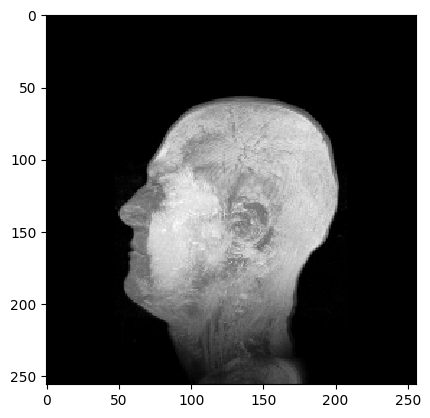

In [2]:
# Laod example data
input_image = cle.asarray(remote_reader('https://imagej.nih.gov/ij/images/t1-head.zip'))
cle.imshow(input_image)

## Copy Slice
In order to visualize specific slices; use slicing as in numpy arrays.

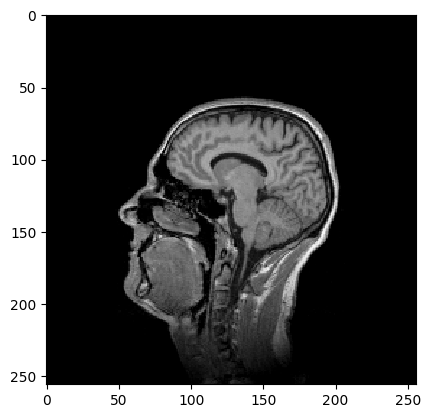

In [3]:
# Copy Slice
image_slice = input_image[60]
cle.imshow(image_slice)

## Projection
pyclesperanto offers min/mean/max and sum projections in x, y and z.

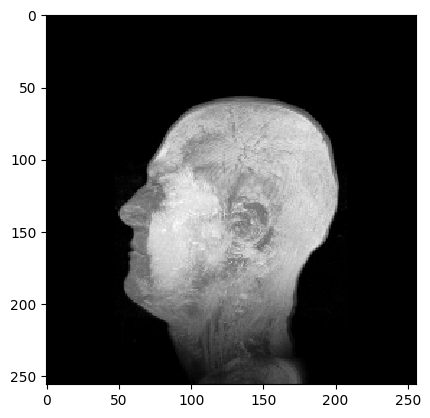

In [4]:
# Maximum Z Projection
projection = cle.maximum_z_projection(input_image)

# show result
cle.imshow(projection)

If you pass an image stack to `cle.imshow` it will make the maximum intensity projection along Z for you:

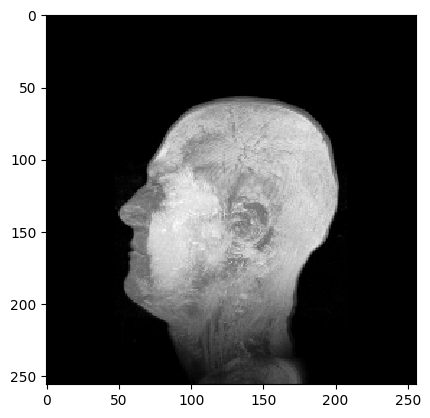

In [5]:
cle.imshow(input_image)

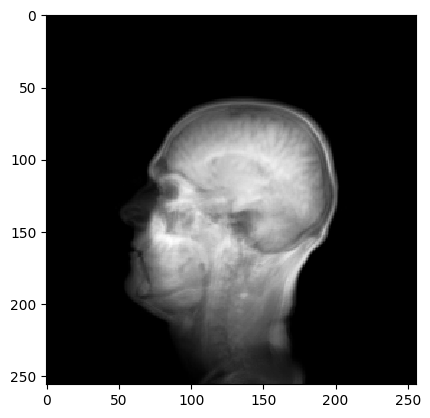

In [6]:
# Sum Z Projection
projection = cle.sum_z_projection(input_image)

# show result
cle.imshow(projection)

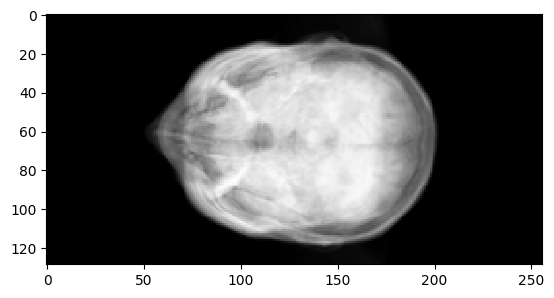

In [7]:
# Mean Y Projection
projection = cle.mean_y_projection(input_image)

# show result
cle.imshow(projection)

## Transpose XZ
In order to transpose axes of images in the GPU, use the transpose methods

In [8]:
# Transpose X against Z
transposed_image = cle.create([256, 256, 129]);
cle.transpose_xz(input_image, transposed_image)

# show result
cle.imshow(transposed_image[126])
cle.imshow(transposed_image[98])

Build log: 


RuntimeError: Error: Failed to execute the kernel. 
	 > Error (ocl): Failed to build kernel. 
	 > Error (ocl): Failed to build program with error code 0

Use subplots to but them side by side

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(15, 7))
cle.imshow(transposed_image[75], plot=axs[0])
cle.imshow(transposed_image[100], plot=axs[1])
cle.imshow(transposed_image[125], plot=axs[2])
cle.imshow(transposed_image[150], plot=axs[3])